In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [79]:
data = pd.read_csv("seattle-weather.csv")
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [80]:
print(data.describe(include = "all"))

              date  precipitation     temp_max     temp_min         wind  \
count         1461    1461.000000  1461.000000  1461.000000  1461.000000   
unique        1461            NaN          NaN          NaN          NaN   
top     2012-01-01            NaN          NaN          NaN          NaN   
freq             1            NaN          NaN          NaN          NaN   
mean           NaN       3.029432    16.439083     8.234771     3.241136   
std            NaN       6.680194     7.349758     5.023004     1.437825   
min            NaN       0.000000    -1.600000    -7.100000     0.400000   
25%            NaN       0.000000    10.600000     4.400000     2.200000   
50%            NaN       0.000000    15.600000     8.300000     3.000000   
75%            NaN       2.800000    22.200000    12.200000     4.000000   
max            NaN      55.900000    35.600000    18.300000     9.500000   

       weather  
count     1461  
unique       5  
top       rain  
freq       641  
me

In [81]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [82]:
#clone initial dataframe to another variable to maintain data integrity.
df = data 

In [83]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [84]:
df.rename(columns={"wind":"wind_speed","weather":"weather_condition"}, inplace=True)
df.tail()

,date,precipitation,temp_max,temp_min,wind_speed,weather_condition
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [85]:
df.dropna()
df.isnull().sum()

date                 0
precipitation        0
temp_max             0
temp_min             0
wind_speed           0
weather_condition    0
dtype: int64

In [86]:
df.describe(include="all")

,date,precipitation,temp_max,temp_min,wind_speed,weather_condition
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


In [129]:
df['mean_temp'] = (df["temp_max"] + df["temp_min"])/2

print(df.head())

df.shape

        date  precipitation  temp_max  temp_min  wind_speed weather_condition  \
0 2012-01-01            0.0      12.8       5.0         4.7           drizzle   
1 2012-01-02           10.9      10.6       2.8         4.5              rain   
2 2012-01-03            0.8      11.7       7.2         2.3              rain   
3 2012-01-04           20.3      12.2       5.6         4.7              rain   
4 2012-01-05            1.3       8.9       2.8         6.1              rain   

   mean_temp  dew_point   humidity  year  month  
0       8.90       5.90  53.466690  2012      1  
1       6.70       3.70  56.821568  2012      1  
2       9.45       6.45  55.535416  2012      1  
3       8.90       5.90  54.506586  2012      1  
4       5.85       2.85  59.890652  2012      1  


(1461, 11)

In [130]:
relative_humidity = 0.7

df['dew_point'] = df[["temp_min", "temp_max"]].mean(axis=1)-((1 - relative_humidity) * 10)

print(df.head())

        date  precipitation  temp_max  temp_min  wind_speed weather_condition  \
0 2012-01-01            0.0      12.8       5.0         4.7           drizzle   
1 2012-01-02           10.9      10.6       2.8         4.5              rain   
2 2012-01-03            0.8      11.7       7.2         2.3              rain   
3 2012-01-04           20.3      12.2       5.6         4.7              rain   
4 2012-01-05            1.3       8.9       2.8         6.1              rain   

   mean_temp  dew_point   humidity  year  month  
0       8.90       5.90  53.466690  2012      1  
1       6.70       3.70  56.821568  2012      1  
2       9.45       6.45  55.535416  2012      1  
3       8.90       5.90  54.506586  2012      1  
4       5.85       2.85  59.890652  2012      1  


In [131]:
df["humidity"] = 100 * (np.exp((17.27 * df["dew_point"]) / (237.7 + df["dew_point"]))
                        / np.exp((17.27 * df["mean_temp"])
                         / (237.7 + df["mean_temp"])))
print(df.head())

        date  precipitation  temp_max  temp_min  wind_speed weather_condition  \
0 2012-01-01            0.0      12.8       5.0         4.7           drizzle   
1 2012-01-02           10.9      10.6       2.8         4.5              rain   
2 2012-01-03            0.8      11.7       7.2         2.3              rain   
3 2012-01-04           20.3      12.2       5.6         4.7              rain   
4 2012-01-05            1.3       8.9       2.8         6.1              rain   

   mean_temp  dew_point   humidity  year  month  
0       8.90       5.90  81.464018  2012      1  
1       6.70       3.70  81.160676  2012      1  
2       9.45       6.45  81.538756  2012      1  
3       8.90       5.90  81.464018  2012      1  
4       5.85       2.85  81.041565  2012      1  


In [132]:
width = 15
height = 10
plt.figure(figsize=(width, height))

figure = px.line(df, x="date", y="humidity", title="humidity in seattle over a certain period")
figure.show()

<Figure size 1500x1000 with 0 Axes>

In [133]:
figure = px.line(df, x="date", y="wind_speed", title = "Windspeed in seattle over a certain period")
figure.show()

In [134]:
figure = px.line(df, x="date", y="mean_temp", title = "Mean teamperature in seattle over a certain period")
figure.show()

In [103]:
# sns.set_style("darkgrid")
# sns.set_palette("Set2")
# sns.lineplot(x="date",y="mean_temp", errorbar = None, data=df,)
# plt.title("precipitation condition over certain period of time")

# plt.show()

In [145]:
df["mean_temp"].isnull().sum()

0

In [147]:
figure = px.scatter(data_frame = df, x="humidity", y="mean_temp",
                   trendline="ols", title="Relationship between temperature and humidity")
figure.show()

In [148]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
print(df.tail())

           date  precipitation  temp_max  temp_min  wind_speed  \
1456 2015-12-27            8.6       4.4       1.7         2.9   
1457 2015-12-28            1.5       5.0       1.7         1.3   
1458 2015-12-29            0.0       7.2       0.6         2.6   
1459 2015-12-30            0.0       5.6      -1.0         3.4   
1460 2015-12-31            0.0       5.6      -2.1         3.5   

     weather_condition  mean_temp  dew_point   humidity  year  month  
1456              rain       3.05       0.05  80.641463  2015     12  
1457              rain       3.35       0.35  80.684908  2015     12  
1458               fog       3.90       0.90  80.764193  2015     12  
1459               sun       2.30      -0.70  80.532238  2015     12  
1460               sun       1.75      -1.25  80.451578  2015     12  


Analyzing Temperature Change \
Now let’s analyze the temperature change in seattle over the years. For this task, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for year and month values.

C:\Users\admin\AppData\Local\Temp\ipykernel_4452\2532644305.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

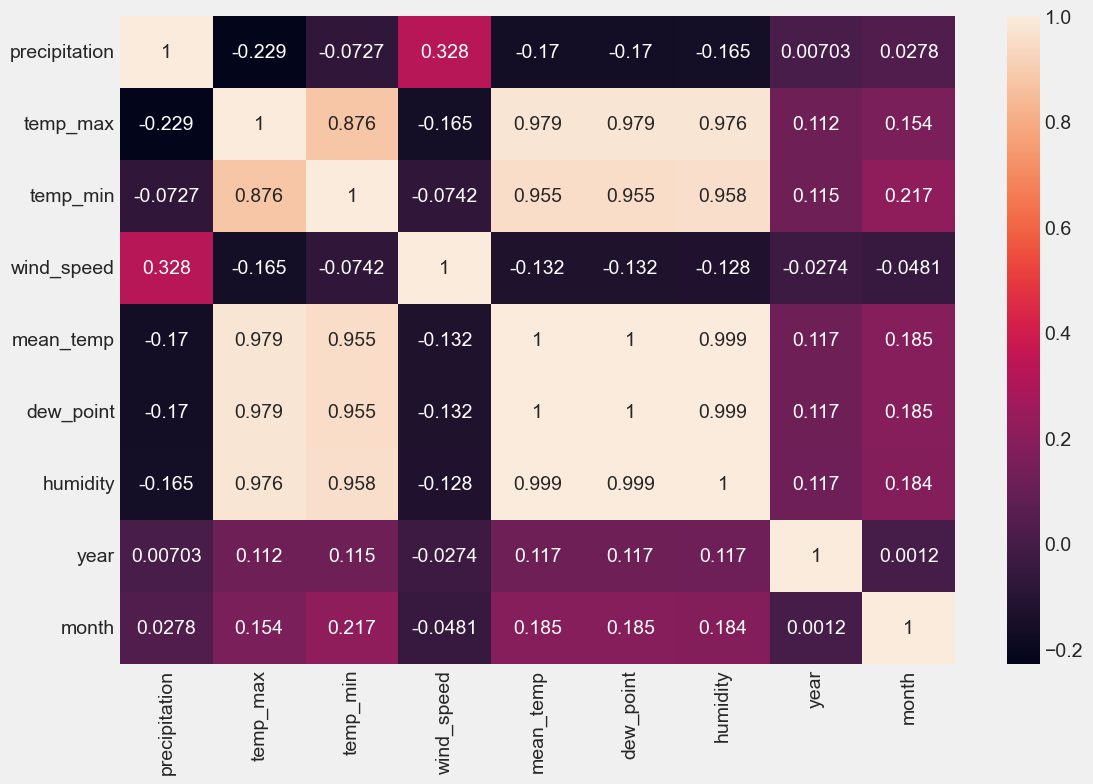

In [149]:
#drop columns temp_min & temp_max from the dataframe before initiating the heatmap correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), fmt=".3g", annot=True)

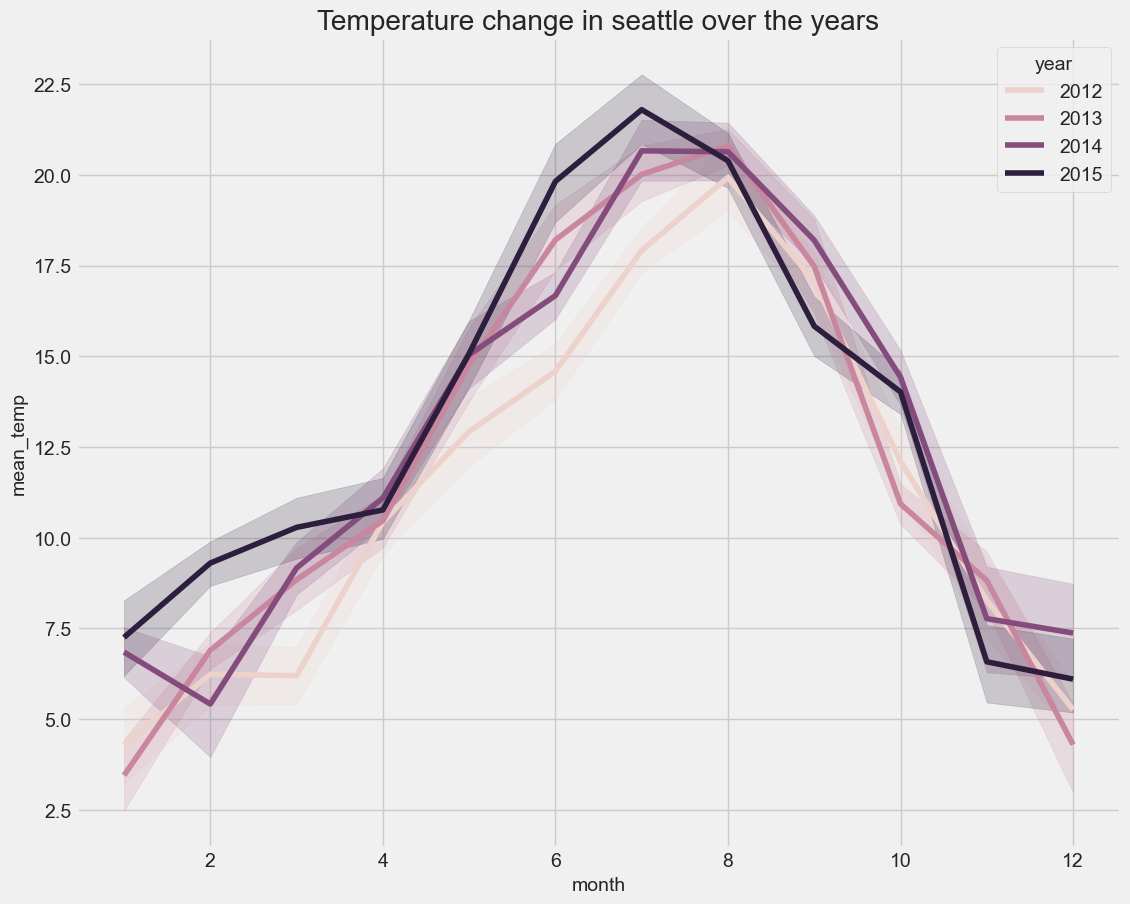

In [150]:
plt.figure(figsize=(12,10))
plt.style.use("fivethirtyeight")
plt.title("Temperature change in seattle over the years")

sns.lineplot(data=df, x="month", y="mean_temp", hue="year")
plt.show()

Forecasting Weather using Python \
Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting. \
The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:

In [151]:
forecast_data = df.rename(columns = {"date":"ds", "mean_temp":"y"})
print(forecast_data)

             ds  precipitation  temp_max  temp_min  wind_speed  \
0    2012-01-01            0.0      12.8       5.0         4.7   
1    2012-01-02           10.9      10.6       2.8         4.5   
2    2012-01-03            0.8      11.7       7.2         2.3   
3    2012-01-04           20.3      12.2       5.6         4.7   
4    2012-01-05            1.3       8.9       2.8         6.1   
...         ...            ...       ...       ...         ...   
1456 2015-12-27            8.6       4.4       1.7         2.9   
1457 2015-12-28            1.5       5.0       1.7         1.3   
1458 2015-12-29            0.0       7.2       0.6         2.6   
1459 2015-12-30            0.0       5.6      -1.0         3.4   
1460 2015-12-31            0.0       5.6      -2.1         3.5   

     weather_condition     y  dew_point   humidity  year  month  
0              drizzle  8.90       5.90  81.464018  2012      1  
1                 rain  6.70       3.70  81.160676  2012      1  
2        

In [152]:
to_drop = ["temp_max","temp_min"]
forecast_data.drop(to_drop, axis=1, inplace=True)
print(forecast_data.head())

          ds  precipitation  wind_speed weather_condition     y  dew_point  \
0 2012-01-01            0.0         4.7           drizzle  8.90       5.90   
1 2012-01-02           10.9         4.5              rain  6.70       3.70   
2 2012-01-03            0.8         2.3              rain  9.45       6.45   
3 2012-01-04           20.3         4.7              rain  8.90       5.90   
4 2012-01-05            1.3         6.1              rain  5.85       2.85   

    humidity  year  month  
0  81.464018  2012      1  
1  81.160676  2012      1  
2  81.538756  2012      1  
3  81.464018  2012      1  
4  81.041565  2012      1  


In [153]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)

forecasts = model.make_future_dataframe(periods=730)
prediction = model.predict(forecasts)

plot_plotly(model,prediction)

20:18:19 - cmdstanpy - INFO - Chain [1] start processing
20:18:21 - cmdstanpy - INFO - Chain [1] done processing
